<a href="https://colab.research.google.com/github/shivanshg29/parameter-optimization-svm/blob/main/ParameterOptimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import random

In [2]:
data = load_iris()
X = data.data
y = data.target

In [3]:
kernel_map = {
    'rbfdot': 'rbf',
    'polydot': 'poly',
    'vanilladot': 'linear',
    'tanhdot': 'sigmoid',
    'laplacedot': 'rbf',
    'anovadot': 'poly'
}
kernel_names = list(kernel_map.keys())

In [7]:
results = []
best_convergence = []
overall_best_acc = -999
overall_best_sample = -1

for sample_index in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=sample_index)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    best_fitness = -999
    best_param = None
    convergence = []

    for iteration in range(100):
        kernel_label = random.choice(kernel_names)
        kernel = kernel_map[kernel_label]
        C = random.uniform(0.1, 10)

        try:
            model = SVC(kernel=kernel, C=C)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
        except:
            acc = -999

        if acc > best_fitness:
            best_fitness = acc
            best_param = (kernel_label, round(C, 2))

        convergence.append(best_fitness)

    results.append([f"S{sample_index+1}", round(best_fitness, 4), best_param])

    if best_fitness > overall_best_acc:
        overall_best_acc = best_fitness
        overall_best_sample = sample_index
        best_convergence = convergence


In [8]:
df = pd.DataFrame(results, columns=["Sample #", "Best Accuracy", "Best Parameters (Kernel, C)"])
print(df)
df.to_csv("svm_iris_classification_results.csv", index=False)

  Sample #  Best Accuracy Best Parameters (Kernel, C)
0       S1         1.0000          (laplacedot, 0.25)
1       S2         0.9778           (vanilladot, 5.3)
2       S3         1.0000          (vanilladot, 6.61)
3       S4         0.9556             (anovadot, 3.7)
4       S5         0.9778           (vanilladot, 4.8)
5       S6         0.9778             (polydot, 5.75)
6       S7         0.9778          (vanilladot, 8.01)
7       S8         0.9556          (vanilladot, 6.89)
8       S9         0.9556          (laplacedot, 1.11)
9      S10         1.0000          (vanilladot, 9.95)


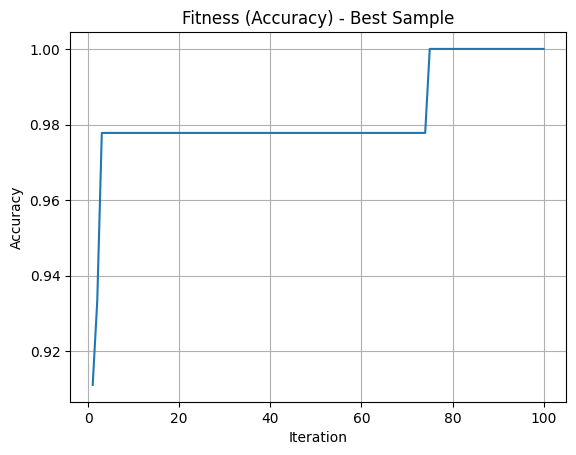

In [9]:
plt.plot(range(1, 101), best_convergence)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Fitness (Accuracy) - Best Sample")
plt.grid(True)
plt.savefig("svm_iris_classification_convergence.png")
plt.show()